# Luhn Abstracts

Luhn, Hans Peter. "The Automatic Creation of Literature Abstracts." *IBM Journal of Research and Revelopment 2.2* (1958): 159-165.

DOI: [10.1147/rd.22.0159](https://ieeexplore.ieee.org/document/5392672)

## Initial Setup

In [1]:
import luhn_abstract as la

## Exhibit 2

This is the source text that was utilized as Exhibit 2 in the article.

*Source: The New York Times, September8, 1957, page E11*  
*Title: Chemistry Is Employed in a Search for New Methods to Conquer Mental Illness*  
*Author: Robert K. Plumb*

In [2]:
val_text = '''By coincidence this weekend in New York City marks the end of the annual meeting of the American Psychological Association and the begining of 
the annual meeting of the American Chemical Society. Psychologists and chemists have never had so much in common as they now have in new studies of the chemical 
basis for human behavior. Exciting new finds in this field were also discussed last week in Iowa City, Iowa, at the annual meeting of the American 
Physiological Society and at Zurich, Switzerland, at the Second International Congress for Psychiatry. Two major recent developments have called the attention 
of chemists, physiologists, physicists and other scientists to mental diseases: It has been found that extremely minute quantities of chemicals can induce 
hallucinations and bizarre psychic disturbances in normal people, and mood-altering drugs (tranquilizers, for instance) have made long-institutionalized people 
amenable to therapy. Money to finance resreach on the physical factors in mental illness is being made available. Progress has 
been achieved toward the understanding of the chemistry of the brain. New goals are in sight. At the psychiatrists meeting in Zurich last week, four New York 
City physicians urged their colleagues to broaden their concept of "mental disease," and to probe more deeply into the chemistry and metabolism of the human 
body for answers to mental disorders and their prevention. Dr. Felix Marti-Ibanez and three brothers, Dr. Mortimer D. Sackler, 
Dr. Raymond R. Sackler and Dr. Arthur M. Sackler cited evidence that the blood chemistry of victims of schizophrenia is different from that of normal people. 
Perhaps multiple biological factors are responsible for this chemical change, they suggested. Mental disease is a "developmental process" and long duration of 
a disorder may result in "permanent alteration of anatomy and physiology," they said. They urged that trials of new drugs which affect the brain should be 
concentrated on complex studies of the mechanism of action of the drugs. The variety of substances capable of producing profound mental effects is a new 
armory of weapons for use in investigating biological mechanisms underlying mental disease, they said. The sources of behavioral disturbance are many and they 
may come from external as well as internal forces, the four reported. This concept has already proven practical, for instances, when it enabled psychiatrists 
to predict that the administration of ACTH and cortisone could produce psychosis. "It led some years ago to the development of a blood test which was 80 percent 
accurate in the identification of schizophrenic patients," they said. "It permitted us on physiologic grounds to deny that the psychoneuroses and the 
psychoses were lesser and greater degrees of the same disease process, and, in fact, to affirm that they represented opposite and even mutually exclusive 
directions of physiologic disturbances," they said. Chemicals now available should he used not only to bring relief to the mentally sick but also to uncover 
the biological mechanisms of the disease processes themselves. "Only then will the metabolic era mature and bring to fruition man's long hoped for salvation 
from the ravages of mental disease," they reported.
At the psychologist's meeting here, a technique for tracing electrical activity in specific portions of the animal brain was described by researchers from the 
University of California at Los Angeles. They reported that deep brain implants in cat brains were used to record electrical discharges created as the animals 
respond to stimulations to which they had been conditioned. In this way the California group reported, it is possible to track the sequence in which the brain 
brings its various parts into play in learning. Specific areas of memory in the brain may be located. Furthermore, the electrical pathways so traced out can 
be blocked temporarily by the use of chemicals. This poses new possibilities for studying brain chemistry changes in health and sickness and their alleviation, 
the California researchers emphasized. The new studies of brain chemistry have provided practical therapeutic results and tremendous encouragement to those who 
must care for mental patients. One evidence that knowledge in the interdisciplinary field is accumulating fast came last week in an announcement from Washington. 
This was the establishment by the National Institute of Mental Health of a clearing house of information on psychopharmacology. Literature in the field will be 
classified and coded so that staff members can answer a wide variety bf technical and scientific questions. People working in the field are invited to send three 
copies of papers or other material — even informal letters describing work they may have in progress to the Technical Information Unit of the center In 
Silver Spring, Md.'''
val_text = val_text.replace('\n','')

In [3]:
luhn_rtn = la.luhn_abstract.run_auto_summarization(val_text=val_text,is_print=True,func_stem_selected=la.luhn_abstract.tokenize_stem_nltk)

Quantile Significance Lower = 2
Quantile Significance Upper = 42
At the psychiatrists meeting in Zurich last week, four New York City physicians urged their colleagues to broaden their concept of "mental disease," and to probe more deeply into the chemistry and metabolism of the human body for answers to mental disorders and their prevention. [26.2727] "Only then will the metabolic era mature and bring to fruition man's long hoped for salvation from the ravages of mental disease," they reported.At the psychologist's meeting here, a technique for tracing electrical activity in specific portions of the animal brain was described by researchers from the University of California at Los Angeles. [24.0000] Two major recent developments have called the attention of chemists, physiologists, physicists and other scientists to mental diseases: It has been found that extremely minute quantities of chemicals can induce hallucinations and bizarre psychic disturbances in normal people, and mood-alte

In [4]:
luhn_rtn = la.luhn_abstract.run_auto_summarization(val_text=val_text,is_print=True,val_n_gram=2,func_stem_selected=la.luhn_abstract.tokenize_stem_nltk)

Quantile Significance Lower = 1
Quantile Significance Upper = 2
By coincidence this weekend in New York City marks the end of the annual meeting of the American Psychological Association and the begining of the annual meeting of the American Chemical Society. [3.0000] Psychologists and chemists have never had so much in common as they now have in new studies of the chemical basis for human behavior. [3.0000] At the psychiatrists meeting in Zurich last week, four New York City physicians urged their colleagues to broaden their concept of "mental disease," and to probe more deeply into the chemistry and metabolism of the human body for answers to mental disorders and their prevention. [2.0000] "Only then will the metabolic era mature and bring to fruition man's long hoped for salvation from the ravages of mental disease," they reported.At the psychologist's meeting here, a technique for tracing electrical activity in specific portions of the animal brain was described by researchers from

## Effort #1: Explore the Parameter Space

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [6]:
vec_quant_lower = np.arange(start=1,stop=31)#1,31
vec_quant_upper = np.arange(start=10,stop=55)#10,56 -> 30,56
vec_num_apart = np.arange(start=4,stop=8)
vec_article_sent_id = [3.,23.,24.]
vec_article_send_score = [4.0,5.4,5.4]

In [7]:
%%time
val_num_sents = len(vec_article_sent_id)
#Setup storage for iteration results...
val_cnt = 0
vec_iters = []
#Create iterations over test conditions...
for val_lower in tqdm(vec_quant_lower):
    for is_sw_remove in [True,False]:
        for is_sw_zero in [True,False]:
            for func_stem_selected in [None,la.luhn_abstract.tokenize_stem_nltk,la.luhn_abstract.tokenize_stem_luhn]:
                for vec_ignore_words in [[],la.luhn_abstract.vec_luhn_sw]:
                    for val_num_apart in vec_num_apart:
                        for val_upper in vec_quant_upper:
                            if(val_lower < val_upper):
                                luhn_rtn = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                                                   val_lower_int=val_lower,
                                                                                   val_upper_int=val_upper,
                                                                                   val_spacing=val_num_apart,
                                                                                   val_n_gram=-1,
                                                                                   val_num_sentences=val_num_sents,
                                                                                   is_sw_remove=is_sw_remove,
                                                                                   is_sw_zero=is_sw_zero,
                                                                                   is_use_luhn_tf=True,
                                                                                   vec_sw_luhn=vec_ignore_words,
                                                                                   vec_sw_add=[],
                                                                                   func_stem_selected=func_stem_selected,
                                                                                   func_summary_selected=None,
                                                                                   is_print=False)
                                if(luhn_rtn[1].shape[0]>0):
                                    vec_tmp_ids = luhn_rtn[1]['id_sent'].iloc[0:val_num_sents].values.tolist()
                                    vec_tmp_scores = luhn_rtn[1]['score'].iloc[0:val_num_sents].values.tolist()
                                    vec = [vec_tmp_ids,vec_tmp_scores,
                                           len(set(vec_tmp_ids)&set(vec_article_sent_id)),
                                           val_lower,val_upper,val_num_apart,is_sw_remove,is_sw_zero,
                                           not []==vec_ignore_words,
                                           func_stem_selected.__name__ if func_stem_selected else 'None']
                                    vec_iters.append(vec)
                                    del(vec_tmp_ids)
                                    del(vec_tmp_scores)
                            val_cnt += 1

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [1:21:20<00:00, 162.69s/it]

CPU times: user 1h 20min 49s, sys: 27.9 s, total: 1h 21min 17s
Wall time: 1h 21min 20s


In [8]:
df_param_search = pd.DataFrame(vec_iters,columns=['vec_sent_ids','vec_scores','cnt_common','val_bound_lower','val_bound_upper',
                                                  'val_num_apart','is_sw_remove','is_sw_zero','is_luhn_sw','stem_func'])
df_param_search['sum'] = [sum(x) for x in df_param_search['vec_scores']]
df_param_search.sort_values(by=['cnt_common','sum'],ascending=[False,False],inplace=True)
print(f'''This resulted in {val_cnt:,} possible parameters to evaluate; however, based on the restrictions for $C$ and $D$, only {df_param_search.shape[0]:,} summaries were generated''')
df_param_search.head()

This resulted in 129,600 possible parameters to evaluate; however, based on the restrictions for $C$ and $D$, only 23,276 summaries were generated


,vec_sent_ids,vec_scores,cnt_common,val_bound_lower,val_bound_upper,val_num_apart,is_sw_remove,is_sw_zero,is_luhn_sw,stem_func,sum
84,"[28.0, 3.0, 24.0]","[14.297297297297296, 11.91891891891892, 10.888...",2,1,13,5,False,True,False,None,37.105105
85,"[28.0, 3.0, 24.0]","[14.297297297297296, 11.91891891891892, 10.888...",2,1,14,5,False,True,False,None,37.105105
86,"[28.0, 3.0, 24.0]","[14.297297297297296, 11.91891891891892, 10.888...",2,1,15,5,False,True,False,None,37.105105
87,"[28.0, 3.0, 24.0]","[14.297297297297296, 11.91891891891892, 10.888...",2,1,16,5,False,True,False,None,37.105105
88,"[28.0, 3.0, 24.0]","[14.297297297297296, 11.91891891891892, 10.888...",2,1,17,5,False,True,False,None,37.105105


### Evaluate Parameters

Q: What does the distribution for the number of matching sentence IDs look like to the baseline sentences IDs from the article (i.e., $[3,23,24]$)?  
A: &darr;

In [9]:
df_param_search['cnt_common'].value_counts()

cnt_common
1    12538
0     9185
2     1553
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, how frequently were stopwords removed from the corpus?  
A: &darr;

In [10]:
df_param_search.loc[(df_param_search['cnt_common']==2)]['is_sw_remove'].value_counts()

is_sw_remove
False    1495
True       58
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, how frequently were stopword scores zeroed in the corpus?  
A: &darr;

In [11]:
df_param_search.loc[(df_param_search['cnt_common']==2)]['is_sw_zero'].value_counts()

is_sw_zero
False    787
True     766
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, how frequently were the Luhn stopwords (prepositions, pronouns, articles) removed from the corpus?  
A: &darr;

In [12]:
df_param_search.loc[(df_param_search['cnt_common']==2)]['is_luhn_sw'].value_counts()

is_luhn_sw
False    1473
True       80
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, what is pooled effect for NLTK stopword removal, Luhn stopword removal, and consider NLTK stopword zeroing?  
A: &darr;

In [13]:
df_param_search['is_sw_any'] = df_param_search['is_sw_remove']+df_param_search['is_luhn_sw']
df_param_search.loc[(df_param_search['cnt_common']==2)]['is_sw_any'].value_counts()

is_sw_any
False    1453
True      100
Name: count, dtype: int64

In [14]:
df_param_search['is_sw_any'] = df_param_search['is_sw_remove']+df_param_search['is_luhn_sw']+df_param_search['is_sw_zero']
df_param_search.loc[(df_param_search['cnt_common']==2)]['is_sw_any'].value_counts()

is_sw_any
True     826
False    727
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, how frequently were the different stemming functions utilized?  
A: &darr;

In [15]:
df_param_search.loc[(df_param_search['cnt_common']==2)]['stem_func'].value_counts()

stem_func
tokenize_stem_nltk    974
tokenize_stem_luhn    314
None                  265
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs, what is the distribution for the length of the span (i.e., $n$)?  
A: &darr;

In [16]:
df_param_search.loc[(df_param_search['cnt_common']==2)]['val_num_apart'].value_counts()

val_num_apart
5    499
7    474
6    469
4    111
Name: count, dtype: int64

Q: For results with 2 matching sentence IDs and $n==5$, how frequently were stopword scores zeroed in the corpus?  
A: &darr;

In [17]:
df_param_search.loc[(df_param_search['cnt_common']==2) & (df_param_search['val_num_apart']==5)]['is_sw_zero'].value_counts()

is_sw_zero
False    250
True     249
Name: count, dtype: int64

Q: What are the minimum and maximum values for $C$ and $D$ for the different results by the number of matching sentence IDs to the baseline?  This question provides insight into the "resolving power" of the words and how $C$ and $D$ can behave in a similar manner to stopwords.  
A: &darr;

In [18]:
df_param_search.pivot_table(index='cnt_common',values=['val_bound_lower','val_bound_upper'],aggfunc={'val_bound_lower':pd.Series.min,
                                                                                                     'val_bound_upper':pd.Series.max})

,val_bound_lower,val_bound_upper
cnt_common,,
0,1,54
1,1,54
2,1,41


Q: For results with 2 matching sentence IDs, what sentence IDs were identified?  To reduce rearrangements of the same IDs, the vector of IDs is first sorted for each result and then converted to a string value.  
A: &darr;

In [19]:
_ = [x.sort() for x in df_param_search['vec_sent_ids']]
df_param_search['str_sent_id'] = [','.join([f'{j:n}' for j in x]) for x in df_param_search['vec_sent_ids']]
df_param_search.loc[(df_param_search['cnt_common']==2)]['vec_sent_ids'].value_counts()

vec_sent_ids
[0.0, 3.0, 23.0]      768
[3.0, 16.0, 23.0]     400
[18.0, 23.0, 24.0]    107
[1.0, 23.0, 24.0]      48
[0.0, 23.0, 24.0]      32
[19.0, 23.0, 24.0]     32
[16.0, 23.0, 24.0]     32
[2.0, 3.0, 23.0]       17
[3.0, 24.0, 28.0]      14
[3.0, 10.0, 24.0]      13
[3.0, 7.0, 24.0]       12
[5.0, 23.0, 24.0]      12
[3.0, 18.0, 24.0]      12
[7.0, 23.0, 24.0]      10
[3.0, 5.0, 24.0]        9
[3.0, 18.0, 23.0]       8
[12.0, 23.0, 24.0]      6
[3.0, 4.0, 24.0]        6
[11.0, 23.0, 24.0]      4
[3.0, 10.0, 23.0]       4
[10.0, 23.0, 24.0]      4
[4.0, 23.0, 24.0]       2
[13.0, 23.0, 24.0]      1
Name: count, dtype: int64

Q: For sentence ID vectors with 2 matching sentence IDs where the Luhn stopwords were removed, the NLTK stopwords were not removed, and $n==7$, what were the ranges for $C$ and $D$?  This starts to shed light on some of the nuances for identifying all three sentences from the paper with the parameters that were identified as best approximations.  
A: &darr;

In [20]:
df_param_search_subspace = df_param_search.loc[(df_param_search['cnt_common']>=2) &
                    (df_param_search['is_luhn_sw']==False) &
                    (df_param_search['is_sw_remove']==False) &
                    (df_param_search['is_sw_zero']==False) &
                    (df_param_search['stem_func']=='tokenize_stem_nltk') &
                    (df_param_search['val_num_apart']==5)].copy()
print(df_param_search_subspace.shape)

(89, 13)


In [21]:
df_param_search_subspace['vec_sent_ids'].explode().value_counts()

vec_sent_ids
23.0    85
3.0     74
16.0    64
24.0    19
18.0    18
7.0      4
10.0     2
11.0     1
Name: count, dtype: int64

In [22]:
df_param_search_subspace_pvt = df_param_search_subspace.pivot_table(index='str_sent_id',values=['val_bound_lower','val_bound_upper'],
                                                                    aggfunc={'val_bound_lower':pd.Series.min,'val_bound_upper':pd.Series.max}).reset_index()
df_param_search_subspace_pvt

,str_sent_id,val_bound_lower,val_bound_upper
0,"11,23,24",4,10
1,"18,23,24",4,24
2,"3,10,23",7,12
3,"3,16,23",22,41
4,"3,18,23",7,24
5,"3,7,24",11,24


### Identify Quantiles from Parameters

In [23]:
def march_in_direction(val_x:int,vec_numbers:list,is_go_up:bool=True):
    #Finds the index of an integer in the list vec_numbers, either going up or down the sorted the list
    is_found = False
    val_loc = -1
    if(not is_go_up):
        vec_numbers.sort(reverse=True)
    else:
        vec_numbers.sort(reverse=False)
    while(not is_found):
        try:
            val_loc = vec_numbers.index(val_x)
            is_found = True
        except:
            if(is_go_up):
                val_x += 1
            else:
                val_x  -= 1
    if(not is_go_up):
        val_loc = len(vec_numbers)-val_loc-1
        vec_numbers.sort(reverse=False)
    return(val_loc)

In [24]:
def find_q_limits(val_x:int,vec_numbers:list):
    val_q = 0.
    if(val_x>=min(vec_numbers) and val_x<=max(vec_numbers)):
        try:
            vec_numbers.sort(reverse=True)
            val_n_loc_max = len(vec_numbers)-vec_numbers.index(val_x)-1
            vec_numbers.sort(reverse=False)
            val_n_loc_min = vec_numbers.index(val_x)
            val_q = (val_n_loc_min+val_n_loc_max-val_n_loc_min)/(2*len(vec_numbers))
            return(val_q)
        except:
            val_q = np.mean([march_in_direction(val_x=val_x,vec_numbers=vec_numbers,is_go_up=False),march_in_direction(val_x=val_x,vec_numbers=vec_numbers,is_go_up=True)])/len(vec_numbers)
            return(val_q)
    elif(val_x<min(vec_numbers)):
        print('REACHED MIN')
        return(find_q_limits(val_x=min(vec_numbers),vec_numbers=vec_numbers))
    elif(val_x>max(vec_numbers)):
        print('REACHED MAX')
        return(find_q_limits(val_x=max(vec_numbers),vec_numbers=vec_numbers))

In [25]:
#DO NOT REMOVE STOPWORDS
#ZEROING STOPWORDS HAD MINIMAL EFFECT
#DO NOT REMOVE LUHN STOPWORDS
#NLTK STEMMING SEEMED TO HAVE THE MOST RESULTS WITH 2 SENTENCE MATCHES TO ORIGINAL
#5 WAS THE FARTHERST SPAN THAT HAD THE MOST WITH 2 SENTENCE MATCHES TO ORIGINAL
#1<->41 WAS C,D
luhn_rtn = la.luhn_abstract.run_auto_summarization(val_text=val_text,is_print=True,
                                                   vec_sw_luhn=[],
                                                   is_sw_remove=False,
                                                   is_sw_zero=False,
                                                   val_num_sentences=3,
                                                   val_lower_int=1,
                                                   val_upper_int=41,
                                                   val_spacing=5,
                                                   func_stem_selected=la.luhn_abstract.tokenize_stem_nltk)

Two major recent developments have called the attention of chemists, physiologists, physicists and other scientists to mental diseases: It has been found that extremely minute quantities of chemicals can induce hallucinations and bizarre psychic disturbances in normal people, and mood-altering drugs (tranquilizers, for instance) have made long-institutionalized people amenable to therapy. [47.1698] "Only then will the metabolic era mature and bring to fruition man's long hoped for salvation from the ravages of mental disease," they reported.At the psychologist's meeting here, a technique for tracing electrical activity in specific portions of the animal brain was described by researchers from the University of California at Los Angeles. [41.1429] At the psychiatrists meeting in Zurich last week, four New York City physicians urged their colleagues to broaden their concept of "mental disease," and to probe more deeply into the chemistry and metabolism of the human body for answers to me

In [26]:
vec_num_counts = luhn_rtn[0]['count'].tolist()
print(f'''The lower quantile cutoff value (4) is approximately {'{:.4f}'.format(find_q_limits(val_x=4,vec_numbers=vec_num_counts))}...''')
print(f'''The upper quantile cutoff value (41) is approximately {'{:.4f}'.format(find_q_limits(val_x=41,vec_numbers=vec_num_counts))}...''')

The lower quantile cutoff value (4) is approximately 0.3008...
The upper quantile cutoff value (41) is approximately 0.8722...


In [27]:
vec_num_counts = luhn_rtn[0]['count'].tolist()
print(f'''The lower quantile cutoff value ({df_param_search_subspace_pvt['val_bound_lower'].min()}) is approximately {'{:.4f}'.format(find_q_limits(val_x=df_param_search_subspace_pvt['val_bound_lower'].min(),vec_numbers=vec_num_counts))}...''')
print(f'''The upper quantile cutoff value ({df_param_search_subspace_pvt['val_bound_upper'].max()}) is approximately {'{:.4f}'.format(find_q_limits(val_x=df_param_search_subspace_pvt['val_bound_upper'].max(),vec_numbers=vec_num_counts))}...''')

The lower quantile cutoff value (4) is approximately 0.3008...
The upper quantile cutoff value (41) is approximately 0.8722...


## Effort #2: Evaluating Modern NLP Corpus

This effort uses data from the [CNN/Daily Mail](https://paperswithcode.com/dataset/cnn-daily-mail-1) effort, which provides news articles with short summaries written by the author.  The raw dataset was available from the [cnn-dailymail GitHub](https://github.com/abisee/cnn-dailymail).  The parser written below provides a quick method to extract and partially clean the article text while separting the highlights (summary) and retaining the ID.  This parser was not intended to holistically clean and produce text equivalent to the Stanford CoreNLP library, but rather as a method to more easily obtain the data for comparing automatic summariztion.

In [28]:
import glob
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

In [56]:
%%time
#This code provides a rough ETL/parser for the CNN/DailyMail content...
vec_story_files = glob.glob('./data/*.story')
print(f'''There are {len(vec_story_files)} articles in total...''')
vec_data = []
for i,val_file_path in enumerate(vec_story_files):
    tmp_open = open(val_file_path,'r').readlines()
    tmp_story = ''
    tmp_highlights = []
    is_past_story = False
    for line in tmp_open:
        line = line.strip()
        if(not is_past_story and line.startswith('@h')):
            is_past_story = True
        if(not line=='' and not is_past_story):
            tmp_story = tmp_story+' '+line
        elif(not line=='' and not line.startswith('@h')):
            tmp_highlights.append(line)
    if(tmp_story.find('-LRB- CNN -RRB-')>=0):
        vec_story = tmp_story.split('-LRB- CNN -RRB-')
        tmp_story = ' '.join(vec_story[1:])
    if(0<=tmp_story.find('--')<50):
        vec_story = tmp_story.split('--')
        tmp_story = ' '.join(vec_story[1:])
    vec_data.append([val_file_path.split('/')[-1].split('.')[0],tmp_story,tmp_highlights])
    if(i>=9999):
        break

There are 92579 articles in total...
CPU times: user 2.11 s, sys: 2.25 s, total: 4.35 s
Wall time: 14.1 s


In [57]:
df_cnn = pd.DataFrame(vec_data,columns=['article_id','story','highlight'])
print(df_cnn.shape)
df_cnn.head()

(10000, 3)


,article_id,story,highlight
0,638ba1352bdf405a8f5bd681d7fe5c928686afff,At the start of a big week for the Higgs boso...,[U.S.-based scientists say their data points t...
1,f9f9601180ab3278165d936821e8f145659997f3,acquitted by a Florida jury over the death of...,"[Zimmerman posts $ 5,000 bail ; he was accused..."
2,80ec0efb252ec4470aee44482d1e196111b5780b,Zlatan Ibrahimovic scored his third goal in a...,[Barcelona move three points clear of Real Mad...
3,8435150be66ea9792999dfc233cc690f9c2fe2d0,"Nobel laureate Norman E. Borlaug , an agricul...",[Borlaug died at the age of 95 from complicati...
4,1444cf4d1832507a29a98529c2cd1a41f0154b52,Louisiana Gov. Bobby Jindal on Monday stood b...,[Louisiana Gov. Bobby Jindal decried `` no-go ...


It was observed that the following article IDs do not have stories.

In [58]:
print('- '+'\n- '.join(df_cnn.loc[df_cnn['story']=='']['article_id'].tolist()))

- 226ca83313bb4db0917847f80fcf4a2d2af5007d
- c36fb222cee4c1f4e38cf62ad37e2eb8dd0a85be
- d4b4ee22583e0490d5e41e93941e8e6ec182d7ab
- 2cb398794fea7b2dd83501c401c034ca73362323
- 4a524c9714a5651a5f02497d23a8164f868babcd
- 6e782862e65a315c67f8de9b6c6d0b4de21a6126
- 7fa8a466d78b5232c91feceae35025b4c190e049
- 84b530bc2b81c7f6b917906e0f6fc6dec87d4e8e
- abb74e2466084a9968a305ac439229302e5de164
- ce3271caecf540a64b4ae1b5943194ee1084b712
- 97bb70b3837cff47e258c3ddf3aba494e6f4a139


In [59]:
%%time
#Setup storage for iteration results...
val_cnt = 0
vec_results = []

#ROUGE scoring function
rouge_scr = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'],use_stemmer=True)

#Create iterations over test conditions...
for i,val_row in tqdm(df_cnn.iterrows(),total=df_cnn.shape[0],miniters=10):
    if(not val_row['story']==''):
        for val_n_gram_size in [-1,2]:
            for func_summary_method in [None,np.mean]:
                #Ensure the method is generating the same number of sentences as the highlight...
                val_num_sents = len(val_row['highlight'])
                luhn_rtn = la.luhn_abstract.run_auto_summarization(val_text=val_row['story'],
                                                                   val_n_gram=val_n_gram_size,
                                                                   val_num_sentences=val_num_sents,
                                                                   is_sw_remove=False,
                                                                   is_sw_zero=False,
                                                                   is_use_luhn_tf=True,
                                                                   vec_sw_luhn=la.luhn_abstract.vec_luhn_sw,
                                                                   func_stem_selected=la.luhn_abstract.tokenize_stem_nltk,
                                                                   func_summary_selected=func_summary_method,
                                                                   is_print=False)
                if(luhn_rtn[1].shape[0]>0):
                    vec_tmp_ids = luhn_rtn[1]['id_sent'].iloc[0:val_num_sents].values.tolist()
                    vec_results.append([val_row['article_id'],func_summary_method.__name__ if func_summary_method else 'None',val_n_gram_size,
                                        #vec_tmp_ids,luhn_rtn[2],luhn_rtn[3]],
                                        rouge_scr.score(target=' '.join(val_row['highlight']),prediction=' '.join(luhn_rtn[3]))])
                    del(vec_tmp_ids)
                val_cnt += 1

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [1:33:26<00:00,  1.78it/s]

CPU times: user 1h 32min 43s, sys: 48.7 s, total: 1h 33min 32s
Wall time: 1h 33min 26s


In [60]:
df_cnn_msmts = pd.DataFrame(vec_results,columns=['article_id','func_summary_method','n_gram_size','rouge'])
df_cnn_msmts['rouge_1_f'] = [x['rouge1'].fmeasure for x in df_cnn_msmts['rouge']]
df_cnn_msmts['rouge_2_f'] = [x['rouge2'].fmeasure for x in df_cnn_msmts['rouge']]
df_cnn_msmts['rouge_l_f'] = [x['rougeL'].fmeasure for x in df_cnn_msmts['rouge']]
print(f'''This resulted in {val_cnt:,} iterations; {df_cnn_msmts.shape[0]:,} summaries were generated''')
df_cnn_msmts.head()

This resulted in 39,956 iterations; 39,956 summaries were generated


,article_id,func_summary_method,n_gram_size,rouge,rouge_1_f,rouge_2_f,rouge_l_f
0,638ba1352bdf405a8f5bd681d7fe5c928686afff,None,-1,"{'rouge1': (0.2328767123287671, 0.629629629629...",0.340000,0.121212,0.190000
1,638ba1352bdf405a8f5bd681d7fe5c928686afff,mean,-1,"{'rouge1': (0.2556390977443609, 0.629629629629...",0.363636,0.172973,0.160428
2,638ba1352bdf405a8f5bd681d7fe5c928686afff,None,2,"{'rouge1': (0.24761904761904763, 0.48148148148...",0.327044,0.101911,0.150943
3,638ba1352bdf405a8f5bd681d7fe5c928686afff,mean,2,"{'rouge1': (0.37333333333333335, 0.51851851851...",0.434109,0.204724,0.232558
4,f9f9601180ab3278165d936821e8f145659997f3,None,-1,"{'rouge1': (0.1595744680851064, 0.340909090909...",0.217391,0.073529,0.115942


KDE Plots.....

In [61]:
def get_lbls(str):
    vec_str = str.lower().split('_')
    rtn_val = 'Luhn' if vec_str[0]=='none' else vec_str[0].title()
    rtn_val = rtn_val+' '+vec_str[1].title()+'-'+vec_str[2].title()
    return(rtn_val)

In [62]:
def get_plots(df):
    vec_ngrams = df_cnn_msmts['n_gram_size'].unique().tolist()
    vec_ngrams.sort(reverse=False)
    fig,axs = plt.subplots(1,len(vec_ngrams),layout='constrained',figsize=(10,5))
    for i,val_ngram in enumerate(vec_ngrams):
        df_subset = df.loc[df['n_gram_size']==val_ngram].copy()
        df1 = df_subset.pivot_table(index='article_id',columns='func_summary_method',values='rouge_1_f').reset_index()
        df1.columns = ['article_id','none_rouge_1_f','mean_rouge_1_f']
        df2 = df_subset.pivot_table(index='article_id',columns='func_summary_method',values='rouge_2_f').reset_index()
        df2.columns = ['article_id','none_rouge_2_f','mean_rouge_2_f']
        df3 = df_subset.pivot_table(index='article_id',columns='func_summary_method',values='rouge_l_f').reset_index()
        df3.columns = ['article_id','none_rouge_l_f','mean_rouge_l_f']
        df_cnn_msmts_rev = pd.merge(left=df1,right=df2,on='article_id',how='outer')
        df_cnn_msmts_rev = pd.merge(left=df_cnn_msmts_rev,right=df3,on='article_id',how='outer')
        df_cnn_msmts_rev.reset_index(inplace=True,drop=True)
    
        vec_colors = ['#006633','#FFCC33','#00CC66','#FFD966','#F7941E','#9D7F00']
        vec_styles = ['solid','solid','dashed','dashed','dashdot','dashdot']
        vec_columns = ['none_rouge_1_f','mean_rouge_1_f','none_rouge_2_f','mean_rouge_2_f','none_rouge_l_f','mean_rouge_l_f']
        vec_lbls = [get_lbls(x) for x in vec_columns]
        ax = df_cnn_msmts_rev[vec_columns].plot.kde(color=vec_colors,ax=axs[i])
        ax.set_xlim(0.,1.)
        ax.title.set_text('1-Gram' if val_ngram==-1 else f'{val_ngram}-Gram')
        ax.set_xlabel('Rouge-F1 Metric')
        for line,ls in zip(ax.get_lines(),vec_styles):
            line.set_linestyle(ls)
        if(i+1==len(vec_ngrams)):
            leg = ax.legend() 
            for line_legend,ls in zip(leg.get_lines(),vec_styles):
                line_legend.set_linestyle(ls)
            ax.legend(labels=vec_lbls)
        else:
            ax. legend_ = None
        ax.grid(visible=True,which='major',color='#D3D3D3')
    return(fig)

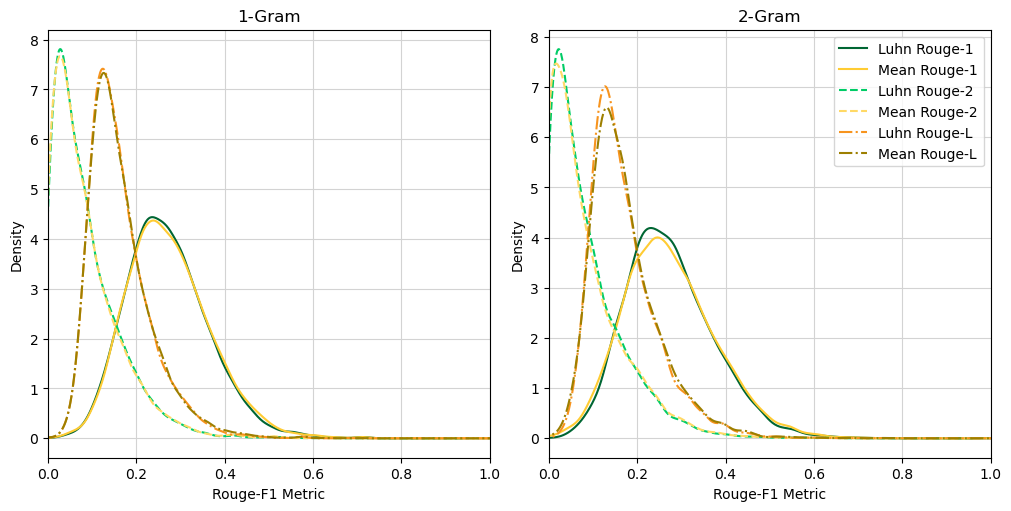

In [63]:
fig = get_plots(df=df_cnn_msmts)
fig.savefig('./images/fig_kde_rouge.png')

In [64]:
np.round(df_cnn_msmts.pivot_table(index=['n_gram_size','func_summary_method'],values=['rouge_1_f','rouge_2_f','rouge_l_f'],aggfunc=pd.Series.mean).reset_index(),4)

,n_gram_size,func_summary_method,rouge_1_f,rouge_2_f,rouge_l_f
0,-1,None,0.2709,0.0849,0.1626
1,-1,mean,0.2731,0.0845,0.1643
2,2,None,0.2729,0.0849,0.1698
3,2,mean,0.2733,0.0841,0.1723


<hr>

# Original Notebook
## Imports/Setup

In [40]:
import requests
import bs4 as bs

In [41]:
def scrape_page_wikipedia(val_url):
    html_scraped_text = requests.get(val_url)
    html_text_parsed = bs.BeautifulSoup(html_scraped_text.content,'lxml')
    html_text_content = html_text_parsed.find(id='content')
    html_text_paragraphs = html_text_content.find_all('p')
    val_text_formatted = ''
    for val in html_text_paragraphs:
        val_text_formatted += val.text
    return(val_text_formatted)

## Examples
### Request NLP Wikipedia Summary

In [42]:
%%time
val_text = scrape_page_wikipedia(val_url='https://en.wikipedia.org/wiki/natural_language_processing')

CPU times: user 163 ms, sys: 9.45 ms, total: 173 ms
Wall time: 403 ms


#### Experiment #1: Use Luhn Score

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | Luhn Counting | True |
| Stop Words Removed from Score | No | False |
| Aggregation Function | Luhn Algorithm | None |

In [43]:
%%time
luhn_rtn_exp1 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 1
Quantile Significance Upper = 32
Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [25.6000] [8] In 2003, word n-gram model, at the time the best statistical algorithm, was outperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors. [19.6923] [57] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit)[58] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[59] and new directions in artificial general intelligence based on the free energy

#### Experiment #2: Remove Stop Words

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| Yes | True |
| Counting Method | Luhn Counting | True |
| Stop Words Removed from Score | No | False |
| Aggregation Function | Luhn Algorithm | None |

In [44]:
%%time
luhn_rtn_exp2 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=True,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 1
Quantile Significance Upper = 10
Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [15.0417] Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning. [10.5625] Only the introduction of hidden Markov models, applied to part-of-speech tagging, announced the end of the old rule-based approach. [8.6429] Neural machine translation, based on then-newly-invented sequence-to-sequence transformations, made obsolete the intermediate steps, such as word alignment, previously necessary for statistical machine translation. [8.4500]
CPU times: user 257 ms, sys: 8.43 ms, total: 265 ms
Wall time: 259 ms


#### Experiment #3: Use Mean Score

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | Luhn Counting | True |
| Stop Words Removed from Score | No | False |
| Aggregation Function | Mean | np.mean |

In [45]:
%%time
luhn_rtn_exp3 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=np.mean,
                                                        is_print=True)

Quantile Significance Lower = 1
Quantile Significance Upper = 32
Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [11.5000] [8] In 2003, word n-gram model, at the time the best statistical algorithm, was outperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors. [9.9623] [17] Symbolic approach, i.e., the hand-coding of a set of rules for manipulating symbols, coupled with a dictionary lookup, was historically the first approach used both by AI in general and by NLP in particular:[18][19] such as by writing grammars or devising heuristic rules for stemming. [8.7000] The premise of symbol

#### Experiment #4: Zero Score Stop Words

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | Luhn Counting | True |
| Stop Words Removed from Score | Yes | True |
| Aggregation Function | Luhn Algorithm | None |

In [46]:
%%time
luhn_rtn_exp4 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=True,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 0
Quantile Significance Upper = 32
[17] Symbolic approach, i.e., the hand-coding of a set of rules for manipulating symbols, coupled with a dictionary lookup, was historically the first approach used both by AI in general and by NLP in particular:[18][19] such as by writing grammars or devising heuristic rules for stemming. [18.7500] As of 2020, three trends among the topics of the long-standing series of CoNLL Shared Tasks can be observed:[46] Most higher-level NLP applications involve aspects that emulate intelligent behaviour and apparent comprehension of natural language. [17.8571] [57] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit)[58] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[59] and new directions in artificial general intelligence based on the free energy principle[60] by British neuroscientist and theoretician

#### Experiment #4: Use TF Counting w/Mean Score

$$tf=\frac{f_t}{\sum{f_t}}$$

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | TF Counting | False |
| Stop Words Removed from Score | No | False |
| Aggregation Function | Mean | np.mean |

In [47]:
%%time
luhn_rtn_exp5 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=False,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=np.mean,
                                                        is_print=True)

Quantile Significance Lower = 0
Quantile Significance Upper = 0
Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [11.5000] [8] In 2003, word n-gram model, at the time the best statistical algorithm, was outperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors. [9.9623] [17] Symbolic approach, i.e., the hand-coding of a set of rules for manipulating symbols, coupled with a dictionary lookup, was historically the first approach used both by AI in general and by NLP in particular:[18][19] such as by writing grammars or devising heuristic rules for stemming. [8.7000] The premise of symboli

#### Experiment #5: Use TF Counting

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | TF Counting | False |
| Stop Words Removed from Score | No | False |
| Aggregation Function | Luhn Algorithm | None |

In [48]:
%%time
luhn_rtn_exp5 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=False,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 0
Quantile Significance Upper = 0
Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [25.6000] [8] In 2003, word n-gram model, at the time the best statistical algorithm, was outperformed by a multi-layer perceptron (with a single hidden layer and context length of several words trained on up to 14 million of words with a CPU cluster in language modelling) by Yoshua Bengio with co-authors. [19.6923] [57] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit)[58] and developments in artificial intelligence, specifically tools and technologies using large language model approaches[59] and new directions in artificial general intelligence based on the free energy 

#### Experiment #5: Use TF Counting w/Stop Words Zeroed

| Parameter | Value (English) | Value (Set) |
| :-: | :-: | :-: |
| Stop Words Removed from Text| No | False |
| Counting Method | TF Counting | False |
| Stop Words Removed from Score | Yes | True |
| Aggregation Function | Mean | np.mean |

In [49]:
%%time
luhn_rtn_exp5 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=True,
                                                        is_use_luhn_tf=False,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=np.mean,
                                                        is_print=True)

Quantile Significance Lower = 0
Quantile Significance Upper = 0
[17] Symbolic approach, i.e., the hand-coding of a set of rules for manipulating symbols, coupled with a dictionary lookup, was historically the first approach used both by AI in general and by NLP in particular:[18][19] such as by writing grammars or devising heuristic rules for stemming. [9.3000] As of 2020, three trends among the topics of the long-standing series of CoNLL Shared Tasks can be observed:[46] Most higher-level NLP applications involve aspects that emulate intelligent behaviour and apparent comprehension of natural language. [8.5526] Machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach:  Although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of LLMs in 2023. [7.6957] [57] Likewise, ideas of cognitive NLP are inherent to neural models multim

### Request George Washington Wikipedia Summary

In [50]:
%%time
val_text = scrape_page_wikipedia(val_url='https://en.wikipedia.org/wiki/George_Washington')

CPU times: user 197 ms, sys: 5.1 ms, total: 202 ms
Wall time: 343 ms


In [51]:
luhn_rtn_exp6 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 4
Quantile Significance Upper = 506
He also maintains that Washington never advocated outright confiscation of tribal land or the forcible removal of tribes and that he berated American settlers who abused natives, admitting that he held out no hope for peaceful relations as long as "frontier settlers entertain the opinion that there is not the same crime (or indeed no crime at all) in killing a native as in killing a white man. [32.9701] Appointed by the Second Continental Congress as commander of the Continental Army in 1775, Washington led Patriot forces to victory in the American Revolutionary War and then served as president of the Constitutional Convention in 1787, which drafted the current Constitution of the United States. [28.8000] While his relationship with Washington would remain friendly, Washington's relationship with his Secretary of War Henry Knox deteriorated after rumors that Knox had profited from contracts for the construction of U.S. f

### Request GMU Wikipedia Summary

In [52]:
val_text = scrape_page_wikipedia(val_url='https://en.wikipedia.org/wiki/George_Mason_University')

In [53]:
luhn_rtn_exp7 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 3
Quantile Significance Upper = 143
8 in the nation for Freedom of Speech and protecting rights enshrined in the First Amendment to the United States Constitution according to the Foundation for Individual Rights and Expression (FIRE), FIRE also posits that the majority viewpoint of the student body leans politically liberal in the sense of modern liberalism in the United States,[138][139] although the political ideologies of libertarianism in the United States[140][141][142] and conservatism in the United States[143][144] are also visible on campus with the university stating that it strives for "comprehensive ideological balance," evidence including but not limited to the university being "home to both the Antonin Scalia Law School and the Jimmy and Rosalynn Carter School for Peace and Conflict Resolution," named after a conservative U.S. Supreme Court Justice (Antonin Scalia) politically appointed by Republican Party U.S. President and a liberal U.S. Pr

## Random Example

*Source: Scientific American*  
*Title: A New Quantum Cheshire Cat Thought Experiment Is Out of the Box*  
*Author: Manon Bischoff*

[A New Quantum Cheshire Cat Thought Experiment Is Out of the Box](https://www.scientificamerican.com/article/a-new-quantum-cheshire-cat-thought-experiment-is-out-of-the-box/)

In [54]:
val_text = '''Physicists seem to be obsessed with cats. James Clerk Maxwell, the father of electrodynamics, studied falling felines to investigate how they turned as they fell. Many physics teachers have used a cat’s fur and a hard rubber rod to explain the phenomenon of frictional electricity. And Erwin Schrödinger famously illustrated the strangeness of quantum physics with a thought experiment involving a cat that is neither dead nor alive.  So it hardly seems surprising that physicists turned to felines once again to name a newly discovered quantum phenomenon in a paper published in the New Journal of Physics in 2013. Their three-sentence study abstract reads, “In this paper we present a quantum Cheshire Cat. In a pre- and post-selected experiment we find the Cat in one place, and its grin in another. The Cat is a photon, while the grin is its circular polarization.”
The newfound phenomenon was one in which certain particle features take a different path from their particle—much like the smile of the Cheshire Cat in Alice’s Adventures in Wonderland, written by Lewis Carroll—a pen name of mathematician Charles Lutwidge Dodgson—and published in 1865. To date, several experiments have demonstrated this curious quantum effect. But the idea has also drawn significant skepticism. Critics are less concerned about the theoretical calculations or experimental rigor than they are about the interpretation of the evidence. “It seems a bit bold to me to talk about disembodied transmission,” says physicist Holger Hofmann of Hiroshima University in Japan. “Instead we should revise our idea of particles.”  Recently researchers led by Yakir Aharonov of Chapman University took the debate to the next level. Aharonov was a co-author of the first paper to propose the quantum Cheshire effect. Now, on the preprint server arXiv.org, he and his colleagues have posted a description of theoretical work that they believe demonstrates that quantum properties can move without any particles at all—like a disembodied grin flitting through the world and influencing its surroundings—in ways that bypass the critical concerns raised in the past.
Aharonov and his colleagues first encountered their quantum Cheshire cat several years ago as they were pondering one of the most fundamental principles of quantum mechanics: nothing can be predicted unambiguously. Unlike classical physics, the same quantum mechanical experiment can have different outcomes under exactly the same conditions. It is therefore impossible to predict the exact outcome of a single experiment—only its outcome with a certain probability. “Nobody understands quantum mechanics. It’s so counterintuitive. We know its laws, but we are always surprised,” says Sandu Popescu, a physicist at the University of Bristol in England, who collaborated with Aharonov on the 2013 paper and the new preprint.
But Aharonov was not satisfied with this uncertainty. So, since the 1980s, he has been exploring ways to investigate fundamental processes despite the probability-based nature of quantum mechanics. Aharonov—now age 92—employs an approach that involves intensively repeating an experiment, grouping results and then examining what came out before and after the experiment and relating these events to each other. “To do this, you have to understand the flow of time in quantum mechanics,” Popescu explains. “We developed a completely new method to combine information from measurements before and after the experiment.”
The researchers have stumbled across several surprises with this method—including their theoretical Cheshire cat. Their idea sounds simple at first: send particles through an optical tool called an interferometer, which causes each particle to move through one of two paths that ultimately merge again at the end. If the setup and measurements were carried out skillfully, Aharonov and his colleagues theorized, it could be shown that the particle traveled a path in the interferometer that differed from the path of its polarization. In other words, they claimed the property of the particle could be measured on one path even though the particle itself took the other—as if the grin and the cat had come apart.
Inspired by this theory, a team led by Tobias Denkmayr, then at the Vienna University of Technology, implemented the experiment with neutrons in a study published in 2014. The team showed that the neutral particles inside an interferometer followed a different path from that of their spin, a quantum mechanical property of particles similar to angular momentum: Denkmayr and his colleagues had indeed found evidence of the Cheshire cat theory. Two years later researchers led by Maximilian Schlosshauer of the University of Portland successfully implemented the same experiment with photons. The scientists saw evidence that the light particles took a different path in the interferometer than their polarization did.
But not everyone is convinced. “Such a separation makes no sense at all. The location of a particle is itself a property of the particle,” Hofmann says. “It would be more accurate to talk about an unusual correlation between location and polarization.” Last November Hofmann and his colleagues provided an alternative explanation based on widely known quantum mechanical effects.
And in another interpretation of the Cheshire cat results, Pablo Saldanha of the Federal University of Minas Gerais in Brazil and his colleagues argue that the findings can be explained with wave-particle duality. “If you take a different view, there are no paradoxes,” Saldanha says, “but all results can be explained with traditional quantum mechanics as simple interference effects.”
Much of the controversy surrounds the way in which particles’ properties and positions are detected in these experiments. Disturbing a particle could alter its quantum mechanical properties. For that reason, the photons or neutrons cannot be recorded inside the interferometer using an ordinary detector. Instead scientists must resort to a principle of weak measurement developed by Aharonov in 1988. A weak measurement makes it possible to scan a particle very lightly without destroying its quantum state. This comes at a price, however: the weak measurement result is extremely inaccurate. (Thus, these experiments must be repeated many times over, to compensate for the fact that each individual measurement is highly uncertain.)
In the quantum Cheshire cat experiments, a weak measurement is made along a path in the interferometer, the paths then merge, and the emerging particles are measured with an ordinary detector. Along one path of the interferometer, a weak measurement of the particle’s position can be taken and, along the other, its spin. Using detectors, physicists can more definitively characterize the particles that traveled through the interferometer and potentially reconstruct what occurred during the particle’s journey. For example, only certain particles will appear in certain detectors, helping the physicists piece together which path their neutron or photon previously took. According to Aharonov, Popescu and their colleagues, the Cheshire cat experiments ultimately reveal that the particle’s position can be confirmed on one path even as its polarization or spin was measured on the other.
Saldanha and his co-authors assert that it is impossible to make claims about quantum systems in the past given their measurements in the present. In other words, the photons and neutrons measured in the final detectors cannot tell us much about their previous trajectory. Instead the wave functions of particles passing through the paths of the interferometer could overlap, which would make it impossible to trace which path a particle had taken. “Ultimately, the paradoxical behaviors are related to the wave-particle duality,” Saldanha says. But in the papers that report evidence of the quantum Cheshire cat, he asserts, the findings “are processed in a sophisticated way that obscures this simpler interpretation.”
Hofmann, meanwhile, has stressed that the results will differ if you measure the system in a different way. This phenomenon is well-known in quantum physics: if, for example, you first measure the speed of a particle and then its position, the result can be different than it would be if you first measured the position of the same particle and then its speed. He and his colleagues therefore contend that Aharonov and his team’s conclusions were correct in themselves—that the particle moved along one path and the polarization followed the other—but that such differing paths do not apply simultaneously.
As Hofmann’s co-author Jonte Hance, also at Hiroshima University, told New Scientist, “It only looks like [the particle and polarization are] separated because you’re measuring one of the properties in one place and the other property in the other place, but that doesn’t mean that the properties are in one place and the other place, that means that the actual measuring itself is affecting it in such a way that it looks like it’s in one place and the other place.”
But these critiques are “missing the point,” Popescu says. He agrees that the work and reasoning put forward by Saldanha and Hofmann’s respective groups are correct—but adds that the best way to test any interpretation is to generate testable predictions from each. “As I understand it, there is no direct way to make predictions based on them,” Popescu says in reference to these alternative explanations. “They kind of have a very old-fashioned way of looking at things: there are contradictions, so you stop doing the math.”
With their recent preprint paper, Aharonov and Popescu, together with physicist Daniel Collins of the University of Bristol, have now described how a particle’s spin can move completely independently of the particle itself—without employing a weak measurement. In their new experimental setup, a particle is located in the left half of an elongated two-part cylinder that is sealed at the outer edges. Because of a highly reflective wall in the middle, the particle has a vanishingly small probability of tunneling through to the right-hand side of the cylinder. In their paper, the researchers provide a proof that even if the particle remains in the left-hand area in almost all cases, it should still be possible to measure a transfer of the particle’s spin at the right-hand outer wall. “It’s amazing, isn’t it?” Collins says. “You think the particle has a spin and the spin should stay with the particle. But the spin crosses the box without the particle.”
This approach would address several of the critical concerns raised thus far. The physicists don't need weak measurements. Nor do they need to group their experimental results to draw temporal conclusions. (That being said, grouping results would still improve the measurements, given that the angular momentum of the wall itself cannot be determined unambiguously because of the Heisenberg uncertainty principle.) But in this scenario, the only physical principles involved are conservation laws, such as the conservation of energy or the conservation of momentum and angular momentum. Popescu and Collins explain that they hope other groups will implement the experiment to observe the effects in the laboratory.
The new work has piqued Hofmann’s interest. “The scenario is exciting because the interaction between polarization and particle motion produces a particularly strong quantum effect that clearly contradicts the particle picture,” he says.
But he still does not see this as proof of disembodied (particle-free) spin transfer. “For me, this means, above all, that it is wrong to assume a measurement-independent reality,” Hofmann says. Instead quantum mechanics allows a particle’s residence to extend to the right-hand region of the cylinder, even if a residence in the left-hand region seems logically compelling. “I think it is quite clear to Aharonov, Collins and Popescu that the space in front of the wall is not really empty,” he adds.
Saldanha, meanwhile, still sees the researchers as overcomplicating what could be explained as traditional quantum interference effects. When discussing the particle’s very low probability of entering the right-hand side of the experimental setup, he explains, “we have to be careful about a ‘vanishingly small probability’ when we refer to waves.” The wave function of the particle could also expand into the right-hand side of the setup and thus influence the angular momentum of the wall. “The same predictions can be made without such dramatic conclusions,” he says.
In response to these critiques, Popescu says, “This is of course another way of thinking about it. The question is whether this interpretation is useful.” Regardless of which interpretation of the events is correct, the quantum Cheshire cat could enable new technological applications. For example, it could be used to transfer information or energy without moving a physical particle—whether made of matter or light.
For Popescu, however, the fundamental questions of physics play a more important role. “It all started when we thought about how time propagates in quantum mechanics,” he says. “And suddenly we were able to discover something fundamental about the laws of conservation.”
'''

In [55]:
luhn_rtn_exp8 = la.luhn_abstract.run_auto_summarization(val_text=val_text,
                                                        is_sw_remove=False,
                                                        is_sw_zero=False,
                                                        is_use_luhn_tf=True,
                                                        vec_sw_luhn=[],
                                                        vec_sw_add=[],
                                                        func_stem_selected=None,
                                                        func_summary_selected=None,
                                                        is_print=True)

Quantile Significance Lower = 3
Quantile Significance Upper = 58
As Hofmann’s co-author Jonte Hance, also at Hiroshima University, told New Scientist, “It only looks like [the particle and polarization are] separated because you’re measuring one of the properties in one place and the other property in the other place, but that doesn’t mean that the properties are in one place and the other place, that means that the actual measuring itself is affecting it in such a way that it looks like it’s in one place and the other place.” But these critiques are “missing the point,” Popescu says. [44.4737] This phenomenon is well-known in quantum physics: if, for example, you first measure the speed of a particle and then its position, the result can be different than it would be if you first measured the position of the same particle and then its speed. [27.2222] According to Aharonov, Popescu and their colleagues, the Cheshire cat experiments ultimately reveal that the particle’s position can be

## Potential Issues...

- Parsing Wikipedia with NLTK results in sentences that are sometimes more than one independent clause/sentence.
- Reproducing the results from the paper is complicated by the fact that exact values for *C* and *D* are not documented.